$$\require{mhchem}$$

# Problem 1. Transient CSTR (60 pt)

Consider two competing reactions:
\begin{align*}
\ce{A + 2B ->[k_1] C}\\
\ce{A + B ->[k_2] D}
\end{align*}
where we want to maximize the amount of species D. Both reactions are elementary. $k_1=0.1$/M^2/min. $k_2=0.2$/M/min. The volume is 200 L. The inlet flow rate is 5 L/min and inlet concentrations are C_A = 5M, C_B = 10M. The tank is initially filled with water (all concentrations = 0). You can neglect volume expansion/etc with changing number of moles due to the aqueous conditions.

## 1.1 Write the mol balance for the two species in the CSTR (10 pt)

The general form of the mole balance for the four species in the CSTR is Accumulation = In -Out + Generation, thus: 
\begin{align*}
    \frac{dN_A}{dt} &= F_{A0} - F_A + r_AV \\
    \frac{dN_B}{dt} &= F_{B0} - F_B + r_BV \\
    \frac{dN_C}{dt} &= -F_C + r_CV \\
    \frac{dN_D}{dt} &= -F_D + r_DV
\end{align*} 

Where:  $F_{i0} = v C_{i0}$, $F_i = v C_i$

\begin{align*}
r_1 &= k_1C_AC_B^2 \\
r_2 &= k_2C_AC_B \\
r_A &= -r_1 - r_2 \\
r_B &= -2r_1 - r_2 \\
r_C &= r_1 \\
r_D &= r_2
\end{align*}


## 1.2 For a single CSTR, calculate and plot the concentrations of all four species (A, B, C, and D) in the reactor from t=0 to 60 mins. (20 pt).

In [1]:
import numpy as np

k1 = 0.1 #1/M^2/min
k2 = 0.2 #1/M/min

V = 200 #L
v0 = 5 #L/min
Cain = 5
Cbin = 10
C0 = np.array([0,0,0,0])

def dNdt(N,t):
    Ca, Cb, Cc, Cd = N/V
    r1 = k1 * Ca * Cb**2
    r2 = k2 * Ca * Cb
    
    dNadt = (-r1 - r2)*V + v0 * (Cain - Ca)
    dNbdt = (-2*r1 - r2)*V + v0 *(Cbin - Cb)
    dNcdt = r1*V -v0 * Cc
    dNddt = r2*V -v0*Cd
    
    return [dNadt,dNbdt,dNcdt,dNddt]

from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

tspan = np.linspace(0,60,100)
sol = odeint(dNdt, C0*V, tspan)

plt.plot(tspan,sol/V)
plt.legend(['A','B','C','D'])
plt.xlabel('Time [min]')
plt.ylabel('Concentration [M]')
plt.show()

<Figure size 640x480 with 1 Axes>

## 1.3 Calculate the selectivity, as defined as $C_D/(C_C+C_D)$ in the outlet stream for the first 60 minutes. (10 pt)



/global/common/cori/software/python/3.6-anaconda-5.2/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


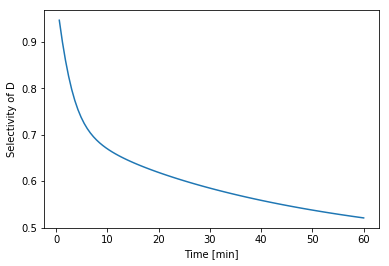

In [2]:
plt.plot(tspan,sol[:,3]/(sol[:,2]+sol[:,3]))
plt.xlabel('Time [min]')
plt.ylabel('Selectivity of D')
plt.show()
#print(sol[:,3]/(sol[:,2]+sol[:,3]))

## 1.4 Consider a membrane CSTR, where the feed stream contains pure $A$, and $B$ can permeate through the walls of the CSTR. The CSTR area is 10 m$^2$, the mass transport constant is $0.3 m/s$, and the concentration of B outside the reactor is 10 M. The volume is of the CSTR is still 200 L. The inlet flow rate is still 5 L/min and inlet concentration of A is C$_A$ = 5M.Write the new mol balance for each species in the CSTR. (10 pt)

![img](E1P1_2018.png)

\begin{align}
Accumulation &=& In - Out + Generation \\
\frac{dN_A}{dt} &=& F_{A0} - F_A + (-r_1-r_2) V \\
\frac{dN_B}{dt} &=& R_B - F_B + (-2r_1-r_2)V \\
\frac{dN_C}{dt} &=& -F_C + r_1V \\
\frac{dN_D}{dt} &=& -F_D + r_2V
\end{align}

Where:
\begin{align}
F_{i0}&=& vC_{i0}\\
F_i &=& v C_i\\
r1 &=& k1* C_A* C_B^2\\
r2 &=& k1* C_A* C_B\\
R_B &=& \frac{Ak_D}{V/1000}(C_{B,s} - C_B)
\end{align}

- k$_{D}$ is the diffusion coefficient of B in m/min.

- C$_{B,s}$ is the concentration of  B  outside the reactor.

- division of $V$ by 1000 to convert the volume with unit of $m^3$

## 1.5 Solve for the new transient profile with the membrane included using the information from 1.4. & Plot the concentration profiles of all four species in the reactor.(10 pt)

With kD = 0.3 m/s:

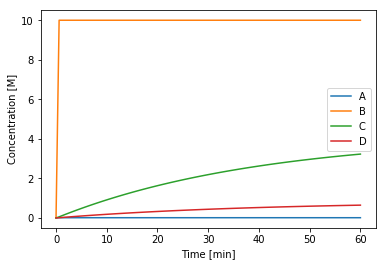

In [3]:
k1 = 0.1 #1/M^2/min
k2 = 0.2 #1/M/min

V = 200 #L
v0 = 5 #L/min
Cain = 5
Cbin = 0
C0 = np.array([0,0,0,0])
kD = 0.3*60 #m/min
A = 10 #m^2
a = A/(V/1000) # area / volume
Cbo = 10 #M

def dNdt(N,t):
    Ca, Cb, Cc, Cd = N/V
    r1 = k1 * Ca * Cb**2
    r2 = k2 * Ca * Cb
    
    dNadt = (-r1 - r2)*V + v0 * (Cain - Ca)
    dNbdt = V*(-2*r1 - r2) + v0 *(Cbin - Cb) + kD * a * (Cbo-Cb) * V
    dNcdt = r1*V -v0 * Cc
    dNddt = r2*V -v0*Cd
    
    return [dNadt,dNbdt,dNcdt,dNddt]

from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

tspan = np.linspace(0,60,100)
sol = odeint(dNdt, C0*V, tspan)

plt.plot(tspan,sol/V)
plt.legend(['A','B','C','D'])
plt.xlabel('Time [min]')
plt.ylabel('Concentration [M]')
plt.show()

With kD = 0.3 m/min:

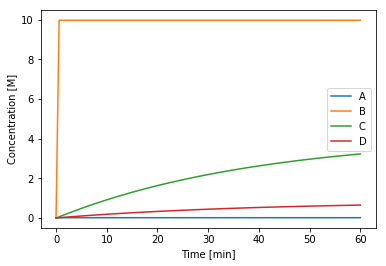

In [4]:
k1 = 0.1 #1/M^2/min
k2 = 0.2 #1/M/min

V = 200 #L
v0 = 5 #L/min
Cain = 5
Cbin = 0
C0 = np.array([0,0,0,0])
kD = 0.3 #m/min
A = 10 #m^2
a = A/(V/1000) # area / volume
Cbo = 10 #M

def dNdt(N,t):
    Ca, Cb, Cc, Cd = N/V
    r1 = k1 * Ca * Cb**2
    r2 = k2 * Ca * Cb
    
    dNadt = (-r1 - r2)*V + v0 * (Cain - Ca)
    dNbdt = V*(-2*r1 - r2) + v0 *(Cbin - Cb) + kD * a * (Cbo-Cb) * V
    dNcdt = r1*V -v0 * Cc
    dNddt = r2*V -v0*Cd
    
    return [dNadt,dNbdt,dNcdt,dNddt]

from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

tspan = np.linspace(0,60,100)
sol = odeint(dNdt, C0*V, tspan)

plt.plot(tspan,sol/V)
plt.legend(['A','B','C','D'])
plt.xlabel('Time [min]')
plt.ylabel('Concentration [M]')
plt.show()

# Problem 2. PFR (40 points)

Consider the system 
\begin{align*}
\ce{A ->[k_1] 6B}
\end{align*}
in the gas phase at 500 K and 10 atm. The inlet is 5 mol/s pure A. The reactor volume is 1200 L. R=0.082 L*atm/mol/K. The reaction is elementary and $k_1=0.1/s$

## 2.1 Calculate the inlet volumetric flow rate and write the mole balance assuming no pressure drop (10 pt)

In [5]:
F0 = 5 #mol/s
R = 0.082 #L*atom/mol/K.
P0 = 10 #atm
v0 = F0 * R * 500 / P0

print(v0)

20.500000000000004


\begin{align*}
r = k_1C_A \\
\frac{dF_A}{dV} &= -r \\
\frac{dF_B}{dV} &= 6r
\end{align*}


## 2.2 Solve for the molar flow rate of each species along the volume of the reactor. (20 pt)

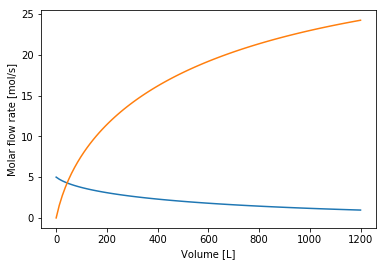

In [6]:
V = 1200 #L
k1 = 0.1 #1/s
F0 = [5, 0] #M
Ft0 = np.sum(F0)

def dFdV(F,V):
    Fa, Fb = F
    Ft = Fa + Fb
    v = v0*Ft/Ft0
    Ca = Fa/v
    r1 = k1 * Ca
    dFadV = -r1
    dFbdV = 6*r1
    return [dFadV,dFbdV]

Vspan = np.linspace(0,V,100)
sol = odeint(dFdV,F0,Vspan)

plt.plot(Vspan,sol)
plt.xlabel('Volume [L]')
plt.ylabel('Molar flow rate [mol/s]')
plt.show()


## 2.3 Would pressure drop along the length of the reactor increase or decrease the final conversion? Why? (5 pt)

Pressure drop decreases the conversion.
It would decrease the flow rate since the feed would be further diluted and the concentration decreased.

##  2.4 Solve for and plot the pressure with profile pressure drop effects and a combined coefficient $\alpha=0.00005$/L. (10 pt)

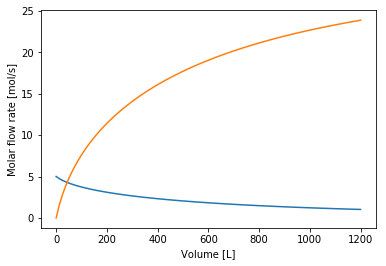

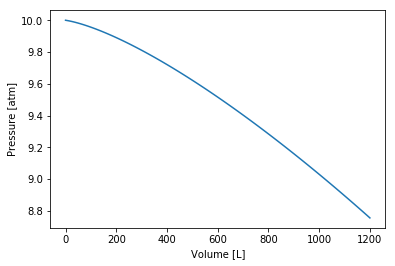

In [7]:
V = 1200 #L
k1 = 0.1 #1/s
F0 = [5, 0] #M
alpha = 0.00005 #/L
#Ft0 = np.sum(F0)
P0 = 10
T = 500
def dFdV(F,V):
    Fa, Fb, y = F
    #Ft = np.sum(F)
    Ft = Fa + Fb
    v = v0*Ft/Ft0/y
    Ca = Fa/v
    r1 = k1 * Ca
    dFadV = -r1
    dFbdV = 6*r1
    dydV = -alpha/(2*y)*Ft/Ft0
    return [dFadV,dFbdV, dydV]

Vspan = np.linspace(0,V,100)
sol = odeint(dFdV,F0+[1],Vspan)
plt.plot(Vspan,sol[:,0:2])
plt.xlabel('Volume [L]')
plt.ylabel('Molar flow rate [mol/s]')
plt.show()
plt.plot(Vspan,sol[:,2]*P0)
plt.xlabel('Volume [L]')
plt.ylabel('Pressure [atm]')
plt.show()


##  Calculate the coefficient $\alpha$ ($L^{-1}$)  that halves the inlet pressure at the end of the reactor. ($P_{exit}$ = 0.5$P_{in}$) 

In [8]:
from scipy.optimize import fsolve

V = 1200 #L
k1 = 0.1 #1/s
F0 = [5, 0] #M
Ft0 = np.sum(F0)

def dFdV(F,V, alpha):
    Fa, Fb, y = F
    Ft = Fa+Fb
    v = v0*Ft/Ft0/y
    Ca = Fa/v
    r1 = k1 * Ca
    dFadV = -r1
    dFbdV = 6*r1
    dydV = -alpha/(2*y)*Ft/Ft0
    return [dFadV,dFbdV, dydV]

def finding(alpha):
    Vspan = np.linspace(0, V, 100)
    sol = odeint(dFdV,F0+[1],Vspan,args=(alpha,))
    return sol[:,2][-1] - 0.5

alpha_solved = fsolve(finding, 0.00005)
print(alpha_solved)

[ 0.00016376]
